<a href="https://colab.research.google.com/github/gerelmaa-b/diveintocode/blob/main/unet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.chdir('/content/drive/My Drive/DIVEINTOCODE/unet') 
print(os.getcwd())

/content/drive/My Drive/DIVEINTOCODE/unet


################### Problem 1 ######################
Learning / estimation

Use the following Keras implementation for learning and estimation.

《Learning in GPU environment》

Large datasets, large models, so you need to use the GPU.

In [2]:
%tensorflow_version 1.x
import tensorflow as tf
#device_name = tf.test.gpu_device_name()
#if device_name != '/device:GPU:0':
#  raise SystemError('GPU device not found')
#print('Found GPU at: {}'.format(device_name))

After that, `%tensorflow_version 1.x` will throw an error.

Your notebook should be updated to use Tensorflow 2.
See the guide at https://www.tensorflow.org/guide/migrate#migrate-from-tensorflow-1x-to-tensorflow-2.

TensorFlow 1.x selected.


In [4]:
!python3 main.py

Using TensorFlow backend.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 256, 1)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 64) 640         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 256, 256, 64) 36928       conv2d_1[0][0]                   
________________________________________________________________________________________

Prediction example

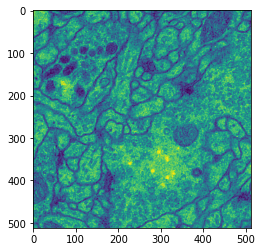

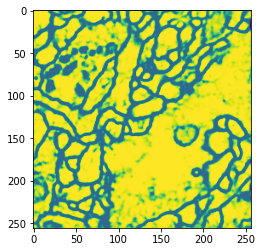

In [5]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
#input_image
im = Image.open("data/membrane/test/1.png")
im_list = np.asarray(im)
plt.imshow(im_list)
plt.show()

im = Image.open("data/membrane/test/1_predict.png")
im_list = np.asarray(im)
plt.imshow(im_list)
plt.show()

<< Application of new data set >>

You need to be prepared to enter a different dataset than the one provided by the published implementation.

In [ ]:
from model import *
from data import *

#os.environ["CUDA_VISIBLE_DEVICES"] = "0"


data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')
myGene = trainGenerator(2,'competition_data/train','images','masks',data_gen_args,save_to_dir = None)

model = unet()
model_checkpoint = ModelCheckpoint('unet_salt.hdf5', monitor='loss',verbose=1, save_best_only=True)
model.fit_generator(myGene,steps_per_epoch=4000,epochs=10,callbacks=[model_checkpoint])


Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            (None, 256, 256, 1)  0                                            
__________________________________________________________________________________________________
conv2d_169 (Conv2D)             (None, 256, 256, 64) 640         input_8[0][0]                    
__________________________________________________________________________________________________
conv2d_170 (Conv2D)             (None, 256, 256, 64) 36928       conv2d_169[0][0]                 
__________________________________________________________________________________________________
max_pooling2d_29 (MaxPooling2D) (None, 128, 128, 64) 0           conv2d_170[0][0]                 
____________________________________________________________________________________________

In [2]:
!pip install h5py==2.10.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.9 MB 24.1 MB/s 
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0


In [6]:
from model import *
from data import *

#os.environ["CUDA_VISIBLE_DEVICES"] = "0"


data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')
myGene = trainGenerator(2,'competition_data/train','images','masks',data_gen_args,save_to_dir = None)

model = unet()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 256, 256, 1)  0                                            
__________________________________________________________________________________________________
conv2d_97 (Conv2D)              (None, 256, 256, 64) 640         input_5[0][0]                    
__________________________________________________________________________________________________
conv2d_98 (Conv2D)              (None, 256, 256, 64) 36928       conv2d_97[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_17 (MaxPooling2D) (None, 128, 128, 64) 0           conv2d_98[0][0]                  
____________________________________________________________________________________________

In [7]:

from keras.preprocessing.image import ImageDataGenerator
import numpy as np 
import os
import glob
import skimage.io as io
import skimage.transform as trans

def testGenerator(test_path,num_image = 30,target_size = (256,256),flag_multi_class = False,as_gray = True):
    filenames = os.listdir(test_path)
    print(filenames)
    for i in range(num_image):
        filename = filenames[i]
        print(filename)
        img = io.imread(os.path.join(test_path,filename),as_gray = as_gray)
        img = img / 255
        img = trans.resize(img,target_size)
        img = np.reshape(img,img.shape+(1,)) if (not flag_multi_class) else img
        img = np.reshape(img,(1,)+img.shape)
        yield img


In [8]:
testGene = testGenerator("competition_data/test/test1")
model = unet()
model.load_weights("unet_salt.hdf5")
results = model.predict_generator(testGene,30,verbose=1)
saveResult("competition_data/test/prediction",results)

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 256, 256, 1)  0                                            
__________________________________________________________________________________________________
conv2d_121 (Conv2D)             (None, 256, 256, 64) 640         input_6[0][0]                    
__________________________________________________________________________________________________
conv2d_122 (Conv2D)             (None, 256, 256, 64) 36928       conv2d_121[0][0]                 
__________________________________________________________________________________________________
max_pooling2d_21 (MaxPooling2D) (None, 128, 128, 64) 0           conv2d_122[0][0]                 
____________________________________________________________________________________________

/content/drive/My Drive/DIVEINTOCODE/unet/data.py:124: UserWarning: competition_data/test/prediction/0_predict.png is a low contrast image
  io.imsave(os.path.join(save_path,"%d_predict.png"%i),img)
/content/drive/My Drive/DIVEINTOCODE/unet/data.py:124: UserWarning: competition_data/test/prediction/1_predict.png is a low contrast image
  io.imsave(os.path.join(save_path,"%d_predict.png"%i),img)
/content/drive/My Drive/DIVEINTOCODE/unet/data.py:124: UserWarning: competition_data/test/prediction/2_predict.png is a low contrast image
  io.imsave(os.path.join(save_path,"%d_predict.png"%i),img)
/content/drive/My Drive/DIVEINTOCODE/unet/data.py:124: UserWarning: competition_data/test/prediction/3_predict.png is a low contrast image
  io.imsave(os.path.join(save_path,"%d_predict.png"%i),img)
/content/drive/My Drive/DIVEINTOCODE/unet/data.py:124: UserWarning: competition_data/test/prediction/4_predict.png is a low contrast image
  io.imsave(os.path.join(save_path,"%d_predict.png"%i),img)
/cont

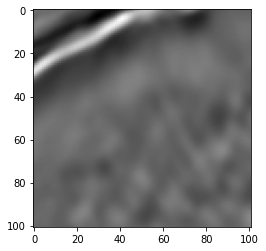

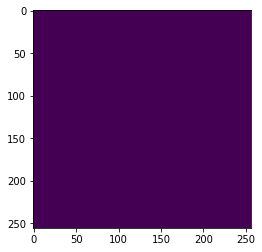

In [4]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
#input_image
im = Image.open("competition_data/test/images/3d53b0ae57.png")
im_list = np.asarray(im)
plt.imshow(im_list)
plt.show()

im = Image.open("competition_data/test/prediction/0_predict.png")
im_list = np.asarray(im)
plt.imshow(im_list)
plt.show()

############## Problem 2 ###############

Code reading

Please read the article [1] and read the code of the above implementation.

The network is based on a fully convolutional network. The architecture is symmetric and consists of two main parts including contracting path and expansive path.The left part is called the contracting path, represent the general convolutional process. The right part is an expansive path, represent transposed 2D convolutional layers.

In expansive path, increase the size with Upsampling and double the number of outputs with Conv. Add the output result of the corresponding part of contracting path with concatenate and merge it with Conv.


In the paper, in order to emphasize the boundary between classes, loss is weighted depending on the distance from the cell to the boundary of the class, but in the Git implementation, Binary_crossentropy (for binary classification) is used. 